In [1]:
import pandas as pd

df = pd.read_excel(
    '/Users/rustem/Desktop/test_habr.xlsx', sheet_name='Квалификация'
)

In [2]:
#Просмотрим информацию по таблице
df.info()
data = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_id         1040 non-null   int64 
 1   Salary          1040 non-null   int64 
 2   City            1040 non-null   object
 3   Specialization  1040 non-null   object
 4   Grade           1040 non-null   object
dtypes: int64(2), object(3)
memory usage: 40.8+ KB


Можно приступать к анализу. Было решено разбить таблицу на группы и создать отдельные датафреймы по грейдам, так как распределение зарплат удобнее визуально сравнить у одинаковых грейдов.

In [23]:
# Начнем с группировки данных по грейду. В пределах грейда значения зарплат будет легче анализировать по разным специальностям, чем через группировку по специальностям в разрезе грейдов.
grouped_by_grade = data.groupby('Grade')

# Создаем отдельные датафреймы для каждого уровня грейда
grade_data_frames = {}
for grade, grade_data in grouped_by_grade:
    grade_data_frames[grade] = grade_data

Данные сгруппированы по грейдам.

In [24]:
# Напишем названия переменных наших датафреймов
intern_df = grade_data_frames.get("Intern")
junior_df = grade_data_frames.get("Junior")
middle_df = grade_data_frames.get("Middle")
senior_df = grade_data_frames.get("Senior")
teamlead_df = grade_data_frames.get("Teamlead")

Найдем квартили и построим боксплоты для каждого грейда для анализа аномалий зарплат.

In [25]:
# Рассчитываем межквартильный размах для каждого грейда
q1_intern = intern_df['Salary'].quantile(0.25)
q3_intern = intern_df['Salary'].quantile(0.75)
iqr_intern = q3_intern - q1_intern

q1_junior = junior_df['Salary'].quantile(0.25)
q3_junior = junior_df['Salary'].quantile(0.75)
iqr_junior = q3_junior - q1_junior

q1_middle = middle_df['Salary'].quantile(0.25)
q3_middle = middle_df['Salary'].quantile(0.75)
iqr_middle = q3_middle - q1_middle

q1_senior = senior_df['Salary'].quantile(0.25)
q3_senior = senior_df['Salary'].quantile(0.75)
iqr_senior = q3_senior - q1_senior

q1_teamlead = teamlead_df['Salary'].quantile(0.25)
q3_teamlead = teamlead_df['Salary'].quantile(0.75)
iqr_teamlead = q3_teamlead - q1_teamlead

In [26]:
# Рассчитываем нижнюю и верхнюю границы для каждого грейда по квартилям
lower_bound_intern = q1_intern - 1.5 * iqr_intern
upper_bound_intern = q3_intern + 1.5 * iqr_intern

lower_bound_junior = q1_junior - 1.5 * iqr_junior
upper_bound_junior = q3_junior + 1.5 * iqr_junior

lower_bound_middle = q1_middle - 1.5 * iqr_middle
upper_bound_middle = q3_middle + 1.5 * iqr_middle

lower_bound_senior = q1_senior - 1.5 * iqr_senior
upper_bound_senior = q3_senior + 1.5 * iqr_senior

lower_bound_teamlead = q1_teamlead - 1.5 * iqr_teamlead
upper_bound_teamlead = q3_teamlead + 1.5 * iqr_teamlead

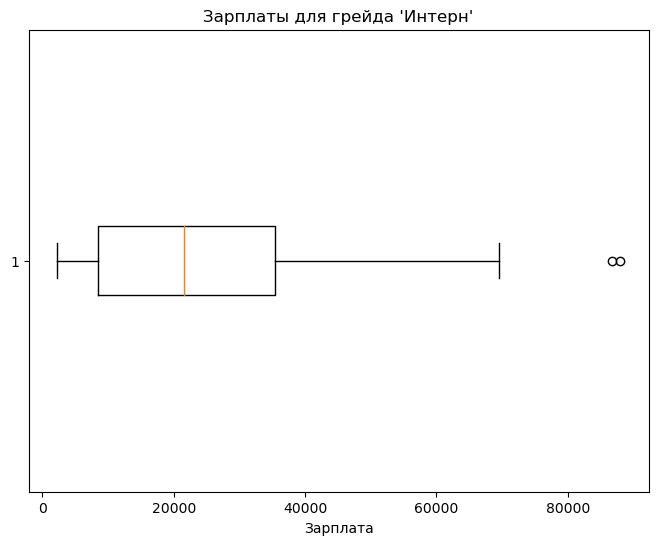

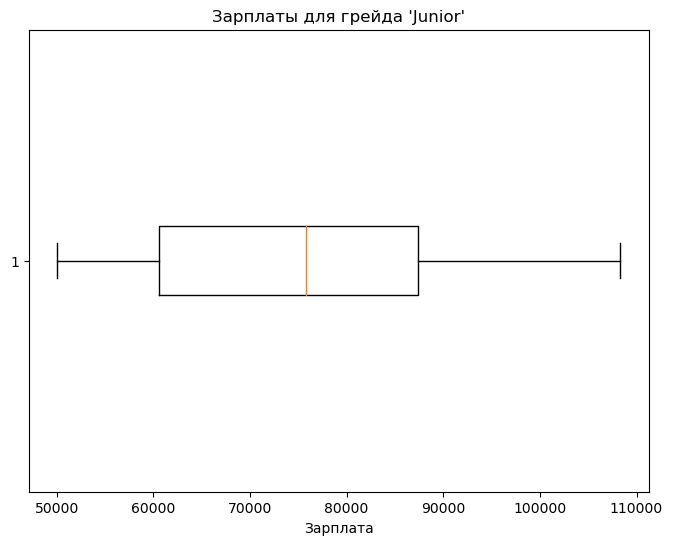

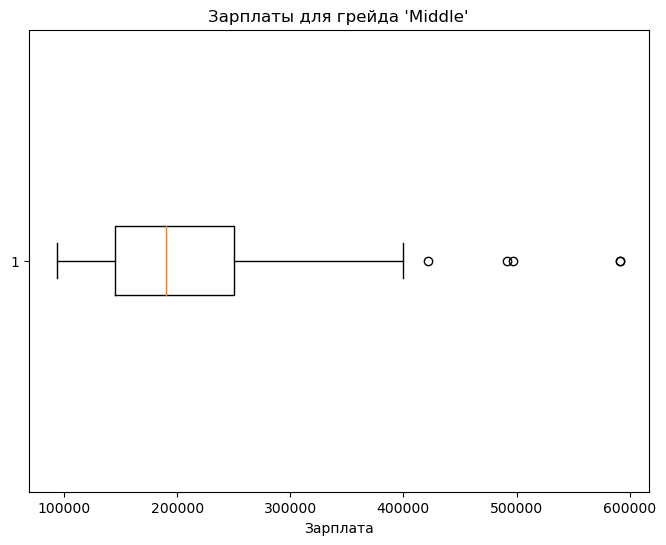

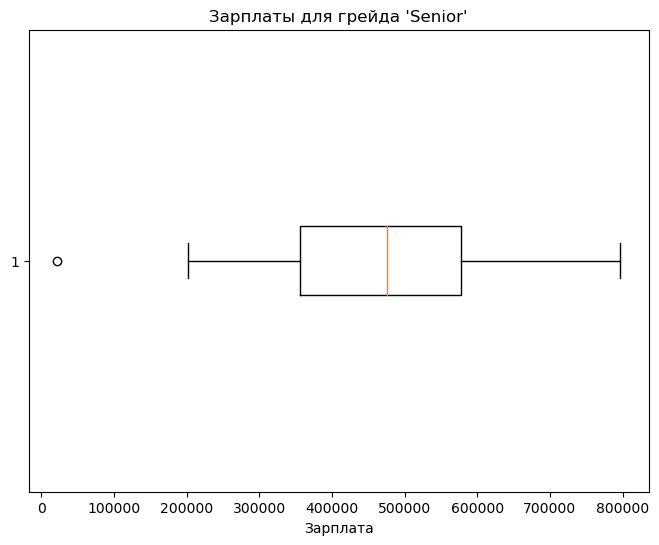

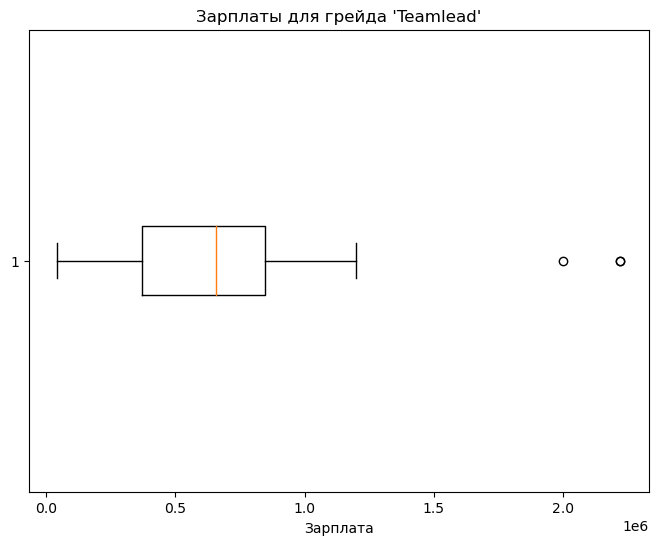

In [27]:
import matplotlib.pyplot as plt
# Построение боксплота для грейда 'Интерн'
plt.figure(figsize=(8, 6))
plt.boxplot(intern_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Интерн'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Junior'
plt.figure(figsize=(8, 6))
plt.boxplot(junior_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Junior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Middle'
plt.figure(figsize=(8, 6))
plt.boxplot(middle_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Middle'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Senior'
plt.figure(figsize=(8, 6))
plt.boxplot(senior_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Senior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Teamlead'
plt.figure(figsize=(8, 6))
plt.boxplot(teamlead_df['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Teamlead'")
plt.xlabel("Зарплата")
plt.show()


Аномалии:
– Intern: 2 значения, выше верхней границы.
– Middle: 4 значения, выше верхней границы. 
– Senior: 1 значение, ниже нижней границы. 
– Teamlead: 2 значения, выше верхней границы. 

Чтобы устранить аномальные значения применим фильтрацию, которая отсекает все значения меньше нижней границы усов боксплота и все значения, которые выше верхней границы боксплота.

In [16]:
# Отсечение аномальных значений для датафрейма грейда 'Интерн'
intern_df_filtered = intern_df[(intern_df['Salary'] >= lower_bound_intern) & (intern_df['Salary'] <= upper_bound_intern)]

# Отсечение аномальных значений для датафрейма грейда 'Junior'
junior_df_filtered = junior_df[(junior_df['Salary'] >= lower_bound_junior) & (junior_df['Salary'] <= upper_bound_junior)]

# Отсечение аномальных значений для датафрейма грейда 'Middle'
middle_df_filtered = middle_df[(middle_df['Salary'] >= lower_bound_middle) & (middle_df['Salary'] <= upper_bound_middle)]

# Отсечение аномальных значений для датафрейма грейда 'Senior'
senior_df_filtered = senior_df[(senior_df['Salary'] >= lower_bound_senior) & (senior_df['Salary'] <= upper_bound_senior)]

# Отсечение аномальных значений для датафрейма грейда 'Teamlead'
teamlead_df_filtered = teamlead_df[(teamlead_df['Salary'] >= lower_bound_teamlead) & (teamlead_df['Salary'] <= upper_bound_teamlead)]


ПОСТРОИМ БОКСПЛОТЫ ПО ОТФИЛЬТРОВАННЫМ ДАННЫМ И ПРОВЕРИМ АНОМАЛИИ

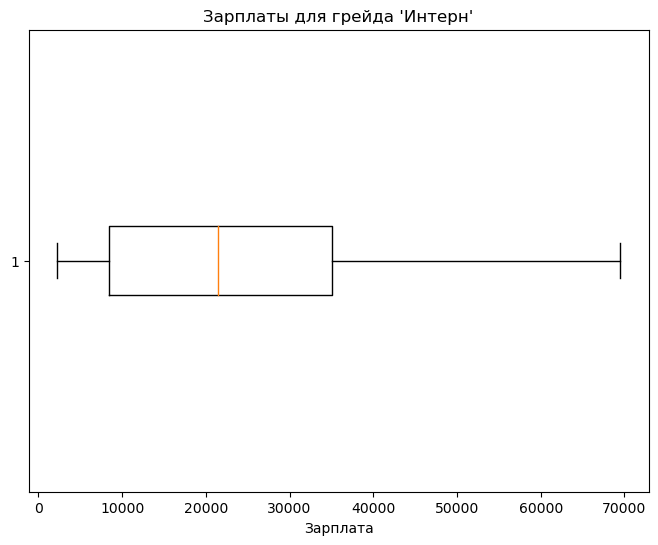

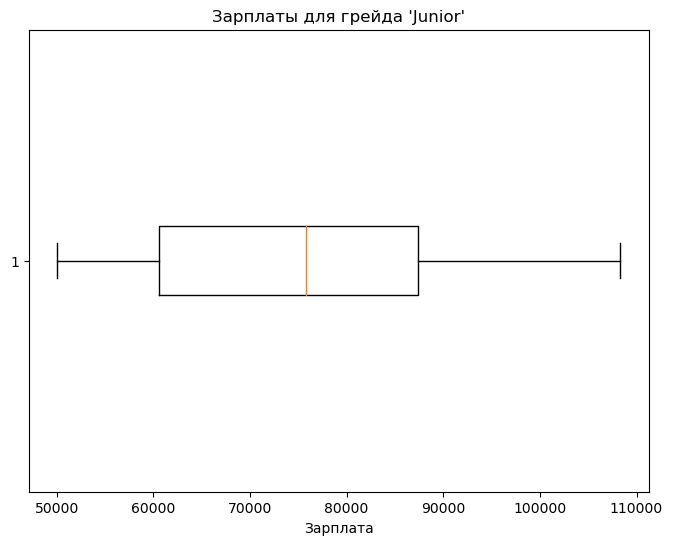

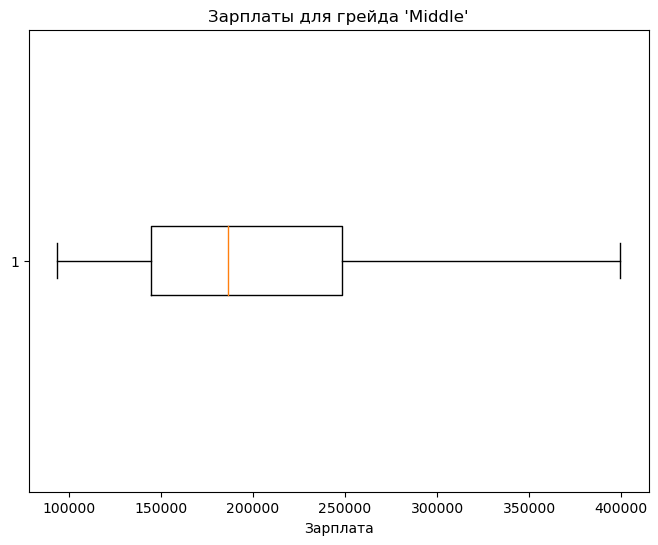

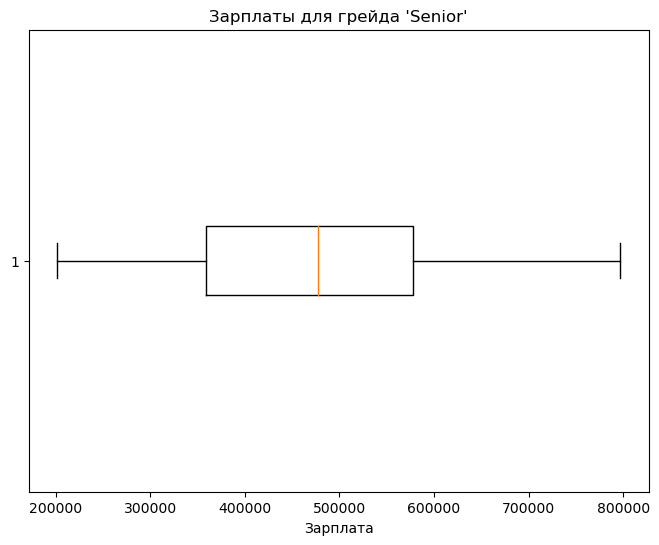

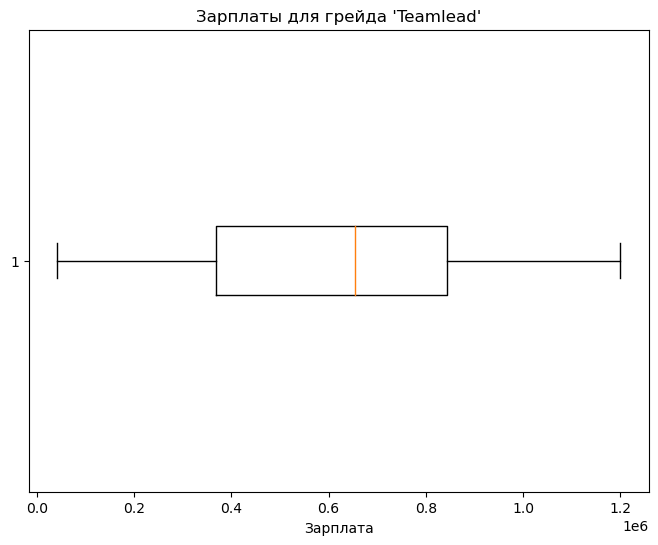

In [18]:
import matplotlib.pyplot as plt

# Построение боксплота для грейда 'Интерн'
plt.figure(figsize=(8, 6))
plt.boxplot(intern_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Интерн'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Junior'
plt.figure(figsize=(8, 6))
plt.boxplot(junior_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Junior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Middle'
plt.figure(figsize=(8, 6))
plt.boxplot(middle_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Middle'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Senior'
plt.figure(figsize=(8, 6))
plt.boxplot(senior_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Senior'")
plt.xlabel("Зарплата")
plt.show()

# Построение боксплота для грейда 'Teamlead'
plt.figure(figsize=(8, 6))
plt.boxplot(teamlead_df_filtered['Salary'], vert=False)
plt.title("Зарплаты для грейда 'Teamlead'")
plt.xlabel("Зарплата")
plt.show()


На обновленных боксплотах нет аномальных точек, значит данные очищенны. 

Исходя из проделанной работы можно сделать вывод, что в исходных данных по зарплатам специалистов были аномальные значения зарплат.

Зарплаты будут считаться аномальными, если будут выходить за значения усов боксплотов. В анализе я не учитывал разницу зарплат в регионах и в Москве. Так как в условии недостаточно данных, чтобы отделить или убрать значения зарплат специалистов в Москве.

Разработчикам следует отфильтровывать/удалять аномальные значения, которые выходят за пределы нижней и верхней границы квартилей.